In [2]:
# Dependencies
import csv
import os
import pandas as pd

In [3]:
# Study data files
anxiety_path = "assets/data/daly-anxiety-age.csv"
depression_path = "assets/data/daly-depression-age.csv"

In [4]:
# Read the data
anxiety_data = pd.read_csv(anxiety_path)
depression_data = pd.read_csv(depression_path)

In [5]:
anxiety_data.columns

Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: Under 5 (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: All Ages (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 70+ years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 50-69 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 5-14 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 15-49 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [6]:
depression_data.columns

Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: Under 5 (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 5-14 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 15-49 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 50-69 years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 70+ years (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: All Ages (Rate)',
       'DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: Age-standardized (Rate)'],
      dtype='object')

In [7]:
anxiety_df = anxiety_data[["Entity", "Year", "DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: Under 5 (Rate)", "DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 5-14 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 15-49 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 50-69 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Anxiety disorders - Sex: Both - Age: 70+ years (Rate)"]]
anxiety_df.columns = ["Entity", "Year", "<5", "5-14", "15-49", "50-69", "70+"]
anxiety_df

,Entity,Year,<5,5-14,15-49,50-69,70+
0,Afghanistan,1990,10.851451,290.799110,583.050750,453.736877,336.764668
1,Afghanistan,1991,10.758383,287.732096,582.755568,453.919631,336.346214
2,Afghanistan,1992,10.387921,284.531098,585.121129,456.690054,336.558722
3,Afghanistan,1993,10.289752,281.185300,585.995450,459.518593,336.870769
4,Afghanistan,1994,10.464435,278.113533,587.736708,459.959994,337.476586
...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,8.612919,218.803990,366.898089,308.151268,240.396429
6464,Zimbabwe,2014,8.731586,218.915348,367.400269,307.741827,239.889862
6465,Zimbabwe,2015,8.646030,218.663565,367.898632,308.310431,240.390428
6466,Zimbabwe,2016,8.777977,218.323865,368.456731,308.376755,240.443753


In [8]:
depression_df = depression_data[["Entity", "Year", "DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: Under 5 (Rate)", "DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 5-14 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 15-49 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 50-69 years (Rate)", "DALYs (Disability-Adjusted Life Years) - Depressive disorders - Sex: Both - Age: 70+ years (Rate)"]]
depression_df.columns = ["Entity", "Year", "<5", "5-14", "15-49", "50-69", "70+"]
depression_df

,Entity,Year,<5,5-14,15-49,50-69,70+
0,Afghanistan,1990,0.271187,171.879841,875.280470,950.293471,766.893212
1,Afghanistan,1991,0.268624,166.950366,870.018856,950.792194,765.393867
2,Afghanistan,1992,0.260249,162.987003,859.514720,954.455355,762.681493
3,Afghanistan,1993,0.258343,159.584534,856.438776,957.746985,760.617836
4,Afghanistan,1994,0.263607,155.962684,861.397337,958.766015,759.161396
...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,0.207890,99.998684,510.320566,896.809679,1175.721573
6464,Zimbabwe,2014,0.208552,100.062666,514.009756,901.387971,1179.094335
6465,Zimbabwe,2015,0.209203,99.655702,518.964077,905.877422,1183.005990
6466,Zimbabwe,2016,0.209759,99.808751,523.691812,911.817819,1185.139894


In [9]:
# Combine the data into a single dataset
mhdata_combined = anxiety_df.merge(depression_df, left_index=True, right_index=True)
mhdata_combined

,Entity_x,Year_x,<5_x,5-14_x,15-49_x,50-69_x,70+_x,Entity_y,Year_y,<5_y,5-14_y,15-49_y,50-69_y,70+_y
0,Afghanistan,1990,10.851451,290.799110,583.050750,453.736877,336.764668,Afghanistan,1990,0.271187,171.879841,875.280470,950.293471,766.893212
1,Afghanistan,1991,10.758383,287.732096,582.755568,453.919631,336.346214,Afghanistan,1991,0.268624,166.950366,870.018856,950.792194,765.393867
2,Afghanistan,1992,10.387921,284.531098,585.121129,456.690054,336.558722,Afghanistan,1992,0.260249,162.987003,859.514720,954.455355,762.681493
3,Afghanistan,1993,10.289752,281.185300,585.995450,459.518593,336.870769,Afghanistan,1993,0.258343,159.584534,856.438776,957.746985,760.617836
4,Afghanistan,1994,10.464435,278.113533,587.736708,459.959994,337.476586,Afghanistan,1994,0.263607,155.962684,861.397337,958.766015,759.161396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,8.612919,218.803990,366.898089,308.151268,240.396429,Zimbabwe,2013,0.207890,99.998684,510.320566,896.809679,1175.721573
6464,Zimbabwe,2014,8.731586,218.915348,367.400269,307.741827,239.889862,Zimbabwe,2014,0.208552,100.062666,514.009756,901.387971,1179.094335
6465,Zimbabwe,2015,8.646030,218.663565,367.898632,308.310431,240.390428,Zimbabwe,2015,0.209203,99.655702,518.964077,905.877422,1183.005990
6466,Zimbabwe,2016,8.777977,218.323865,368.456731,308.376755,240.443753,Zimbabwe,2016,0.209759,99.808751,523.691812,911.817819,1185.139894


In [10]:
# Drop duplicate index columns, reoder and rename to display anxiety and depression side by side by age 
mhdata_combined_df = mhdata_combined[["Entity_x", "Year_x", "<5_x", "<5_y", "5-14_x", "5-14_y", "15-49_x", "15-49_y", "50-69_x", "50-69_y", "70+_x", "70+_y"]]
mhdata_combined_df.columns = ["Entity", "Year", "A_<5", "D_<5", "A_5-14", "D_5-14", "A_15-49", "D_15-49", "A_50-69", "D_50-69", "A_70+", "D_70+"]
mhdata_combined_df

,Entity,Year,A_<5,D_<5,A_5-14,D_5-14,A_15-49,D_15-49,A_50-69,D_50-69,A_70+,D_70+
0,Afghanistan,1990,10.851451,0.271187,290.799110,171.879841,583.050750,875.280470,453.736877,950.293471,336.764668,766.893212
1,Afghanistan,1991,10.758383,0.268624,287.732096,166.950366,582.755568,870.018856,453.919631,950.792194,336.346214,765.393867
2,Afghanistan,1992,10.387921,0.260249,284.531098,162.987003,585.121129,859.514720,456.690054,954.455355,336.558722,762.681493
3,Afghanistan,1993,10.289752,0.258343,281.185300,159.584534,585.995450,856.438776,459.518593,957.746985,336.870769,760.617836
4,Afghanistan,1994,10.464435,0.263607,278.113533,155.962684,587.736708,861.397337,459.959994,958.766015,337.476586,759.161396
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,8.612919,0.207890,218.803990,99.998684,366.898089,510.320566,308.151268,896.809679,240.396429,1175.721573
6464,Zimbabwe,2014,8.731586,0.208552,218.915348,100.062666,367.400269,514.009756,307.741827,901.387971,239.889862,1179.094335
6465,Zimbabwe,2015,8.646030,0.209203,218.663565,99.655702,367.898632,518.964077,308.310431,905.877422,240.390428,1183.005990
6466,Zimbabwe,2016,8.777977,0.209759,218.323865,99.808751,368.456731,523.691812,308.376755,911.817819,240.443753,1185.139894


In [33]:
# Count number of countries to confirm all countries have all the years (1990 - 2017). 6468 / 28
mhdata_country_count = mhdata_combined_df.groupby("Entity").count()
# mhdata_country_count

In [35]:
# Create a sub-set data from 2007 to 2017 (10 years of data)
tenyears_df = mhdata_combined_df.loc[mhdata_combined_df['Year'] > 2007]
tenyears_df

,Entity,Year,A_<5,D_<5,A_5-14,D_5-14,A_15-49,D_15-49,A_50-69,D_50-69,A_70+,D_70+
18,Afghanistan,2008,11.190344,0.276865,285.302095,160.887179,591.666848,919.350405,460.832131,955.197617,343.621701,765.491611
19,Afghanistan,2009,11.190413,0.277283,284.882672,160.757247,590.211469,915.770934,460.427662,954.600220,343.999876,764.233108
20,Afghanistan,2010,11.164374,0.276706,285.705776,160.616757,588.799095,912.323309,460.940512,954.367317,345.585972,764.960950
21,Afghanistan,2011,11.130420,0.275908,285.140186,160.392889,588.387239,907.587766,461.705880,956.192691,346.270565,765.245834
22,Afghanistan,2012,11.102580,0.275765,285.766635,160.965503,588.668200,904.871195,464.496756,960.138828,346.973237,767.105766
...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,8.612919,0.207890,218.803990,99.998684,366.898089,510.320566,308.151268,896.809679,240.396429,1175.721573
6464,Zimbabwe,2014,8.731586,0.208552,218.915348,100.062666,367.400269,514.009756,307.741827,901.387971,239.889862,1179.094335
6465,Zimbabwe,2015,8.646030,0.209203,218.663565,99.655702,367.898632,518.964077,308.310431,905.877422,240.390428,1183.005990
6466,Zimbabwe,2016,8.777977,0.209759,218.323865,99.808751,368.456731,523.691812,308.376755,911.817819,240.443753,1185.139894


In [45]:
# Create the model and fit model to data

# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [55]:
# Testing for loops

afghanistan = tenyears_df.loc[tenyears_df['Entity'] == 'Afghanistan', :]
afghanistan_subset = afghanistan.loc[:, ['Entity', 'Year', 'A_<5']]
afghanistan_subset

,Entity,Year,A_<5
18,Afghanistan,2008,11.190344
19,Afghanistan,2009,11.190413
20,Afghanistan,2010,11.164374
21,Afghanistan,2011,11.130420
22,Afghanistan,2012,11.102580
23,Afghanistan,2013,11.037378
24,Afghanistan,2014,11.138128
25,Afghanistan,2015,11.067356
26,Afghanistan,2016,11.247944
27,Afghanistan,2017,11.155336


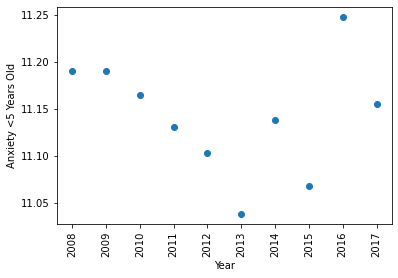

In [61]:
year = afghanistan_subset.iloc[: ,1]
# year
anxiety_less_than_five = afghanistan_subset.iloc[: ,2]
# anxiety_less_than_five

plt.scatter(year, anxiety_less_than_five)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Anxiety <5 Years Old')
plt.show()

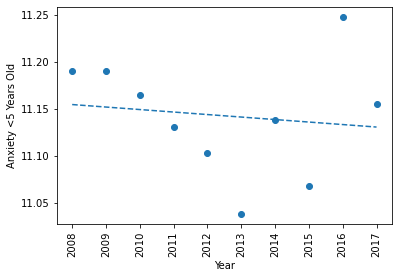

In [63]:
# perform the linear regression
a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(year, anxiety_less_than_five)

# create equation to calculate predicted anxiety
a_fit = a_slope * year + a_int

# plot the line on top of the scatter plot above
plt.scatter(year, anxiety_less_than_five)
plt.plot(year, a_fit, "--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Anxiety <5 Years Old')
plt.show()

Weight coefficients:  [[-0.0026638]]
y-axis intercept:  [16.50332747]
Model score: 0.016820975702878993


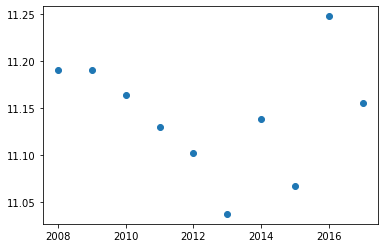

In [75]:
# Deploy ML to estimate the 
from sklearn.linear_model import LinearRegression

# model
# Output ---> LinearRegression()

# Reshape data first

X = year.values.reshape(-1,1)
y = anxiety_less_than_five.values.reshape(-1,1)

# print("Shape: ", X.shape, y.shape)
# X

plt.scatter(X, y)

model = LinearRegression()
model.fit(X, y)
# print(model)

# Print the coefficient and the intercept for the model 
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

print("Model score:", model.score(X, y))

In [82]:
model.predict([[2040], [2021]])

array([[11.06917263],
       [11.11978486]])